In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

In [0]:
url = 'SUNPHARMA.csv'
dataset_train = pd.read_csv(url)
x_training_set = dataset_train.iloc[:, 2:5].values
y_training_set = dataset_train.iloc[:,7:8].values


In [71]:
dataset_train.head()

,ID,Date,High,Low,Open,Close,Volume,Adj Close
0,SUNPHARMA,2014-04-01,578.000000,570.250000,575.000000,572.099976,1186522.0,555.336609
1,SUNPHARMA,2014-04-02,581.500000,570.099976,572.000000,575.250000,3765317.0,558.394409
2,SUNPHARMA,2014-04-03,582.799988,575.200012,578.349976,578.549988,2438673.0,561.597595
3,SUNPHARMA,2014-04-04,584.599976,570.200012,580.000000,571.799988,2519378.0,555.045349
4,SUNPHARMA,2014-04-07,594.799988,573.750000,580.000000,588.099976,10031924.0,570.867798


In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
x_training_set_scaled = sc.fit_transform(x_training_set)
y_training_set_scaled = sc.fit_transform(y_training_set)

In [0]:
# selecting Feature Columns
feature_columns = ['Close']

In [0]:
# X_train = []
# y_train = []
# for i in range(60, 1995):
#   X_train.append(training_set_scaled[i-60:i, 0])
#   y_train.append(training_set_scaled[i, 0])
X_train, Y_train = np.array(x_training_set_scaled), np.array(y_training_set_scaled)
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

In [0]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [76]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(1, X_train.shape[1])))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_tr_t,Y_train,epochs=50,batch_size=32)

Epoch 1/50
923/923 [==============================] - 2s 2ms/step - loss: 0.1559
Epoch 2/50
923/923 [==============================] - 0s 154us/step - loss: 0.0329
Epoch 3/50
923/923 [==============================] - 0s 157us/step - loss: 0.0165
Epoch 4/50
923/923 [==============================] - 0s 156us/step - loss: 0.0090
Epoch 5/50
923/923 [==============================] - 0s 171us/step - loss: 0.0064
Epoch 6/50
923/923 [==============================] - 0s 170us/step - loss: 0.0068
Epoch 7/50
923/923 [==============================] - 0s 169us/step - loss: 0.0057
Epoch 8/50
923/923 [==============================] - 0s 202us/step - loss: 0.0050
Epoch 9/50
923/923 [==============================] - 0s 159us/step - loss: 0.0047
Epoch 10/50
923/923 [==============================] - 0s 166us/step - loss: 0.0036
Epoch 11/50
923/923 [==============================] - 0s 160us/step - loss: 0.0037
Epoch 12/50
923/923 [==============================] - 0s 157us/step - loss: 0.0034
Epo

In [0]:
url = 'SUNPHARMA_test.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 7:8].values

In [0]:
x_testing_set = dataset_test.iloc[:,2:5].values
y_testing_set = dataset_test.iloc[:,7:8].values

In [0]:
x_testing_set_scaled = sc.fit_transform(x_testing_set)
y_testing_set_scaled = sc.fit_transform(y_testing_set)

In [0]:
X_test = np.array(x_testing_set_scaled)
X_ts_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [0]:
# dataset_total = pd.concat((dataset_train['<OPEN>'], dataset_test['<OPEN>']), axis = 0)
# inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
# inputs = inputs.reshape(-1,1)
# inputs = sc.transform(inputs)
# X_test = []
# for i in range(60, 476):
  # X_test.append(inputs[i-60:i, 0])
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_ts_t)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

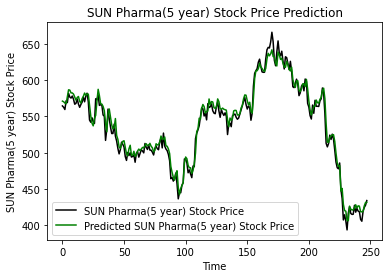

Accuracy : 
0.9773030801091664


In [83]:
plt.plot(real_stock_price, color = 'black', label = 'SUN Pharma(5 year) Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted SUN Pharma(5 year) Stock Price')
plt.title('SUN Pharma(5 year) Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SUN Pharma(5 year) Stock Price')
plt.legend()
plt.show()
print("Accuracy : ")
print(r2_score(real_stock_price,predicted_stock_price))